In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

# Load the CSV file
file_path = './tetris_data.csv'
data = pd.read_csv(file_path)

# Convert the 'state' column from string to list of integers
data['state'] = data['state'].apply(eval)

# Separate features and target
X = pd.DataFrame(data['state'].tolist())
y = data['score']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and train the linear regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)

# Calculate the mean squared error of the predictions
mse = mean_squared_error(y_test, y_pred)

# Output the mean squared error and the model coefficients
print("Mean Squared Error:", mse)
print("Model Coefficients:", model.coef_)


Mean Squared Error: 188674.24317014482
Model Coefficients: [-4.75999117e+01  2.53692160e+00  3.44748824e+01  8.15227101e+00
 -1.66889599e+01  4.05083577e+01 -4.78263902e+01  2.09313939e+01
  7.66351798e+00  3.27232744e+01  4.27969990e+01 -5.13676113e+01
  9.52822468e+00 -1.47770948e+01  9.13197465e+00  2.12801169e+01
 -6.24017831e+01 -2.80786519e+01 -3.77398436e+01 -1.25010879e+00
 -2.87264812e+01  1.91602726e+01  4.24114424e+01  6.95103254e+01
 -2.54951829e+01 -1.81630733e+01 -2.31287823e+01  2.96786996e+01
 -1.22544554e+01  2.03484259e+01  7.06304621e+00  1.50083134e+01
  2.74798323e+00  2.80706306e+01 -1.80114770e+01  3.29390939e+01
  9.99547131e+00 -6.35438366e+01  1.26516407e+01 -3.12182971e+01
 -2.45606396e+01 -9.69613044e+01  3.98082341e+01  2.92369340e+01
 -7.57412522e+00  6.91903983e+01  2.58769564e+01  1.06178674e+01
 -2.71651979e+00  1.91847727e+01 -2.97216699e+01 -2.26617550e+01
 -1.03663282e+01  5.44855725e+01 -7.88305407e+01  2.35509618e+01
  2.63732618e+01 -1.15300363e+0

Initial Data:
   step                                              state    move  score
0     0  [0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, ...    drop    829
1     1  [1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 0, 0, 0, ...   right     90
2     2  [1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, ...  rotate    216
3     3  [0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, ...    drop    946
4     4  [1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, ...   right    929

Processed Data:
   step    move  score  0  1  2  3  4  5  6  ...  190  191  192  193  194  \
0     0    drop    829  0  1  0  0  1  1  0  ...    0    1    1    1    0   
1     1   right     90  1  0  1  0  0  0  1  ...    1    0    0    0    0   
2     2  rotate    216  1  0  0  1  1  1  1  ...    0    0    1    0    0   
3     3    drop    946  0  1  0  0  0  0  1  ...    0    1    1    0    0   
4     4   right    929  1  1  0  1  0  0  0  ...    1    1    1    0    1   

   195  196  197  198  199  
0    1    1    1    1    0  
1   

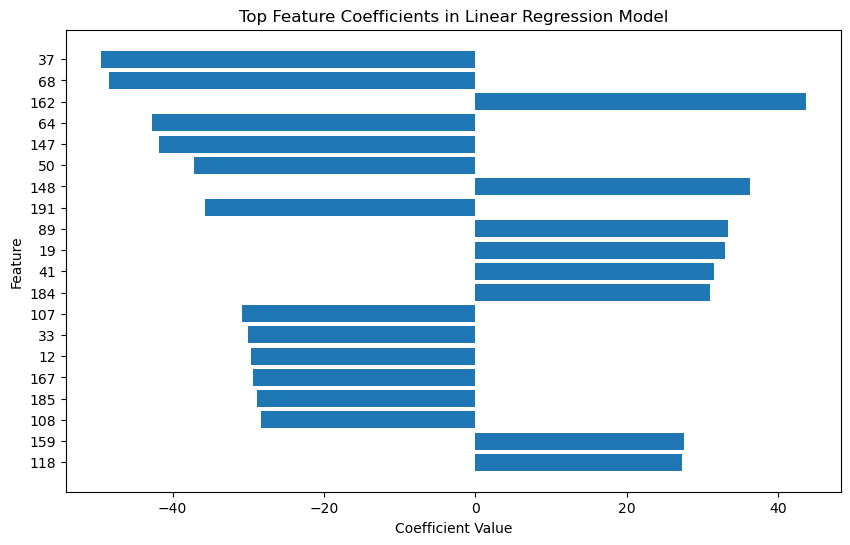

In [2]:
import pandas as pd
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np
import matplotlib.pyplot as plt

# Load the CSV file into a DataFrame
file_path = 'tetris_data.csv'  # Replace with your local path
data = pd.read_csv(file_path)

# Display the first few rows of the DataFrame to understand its structure
print("Initial Data:")
print(data.head())

# Convert the 'state' column from string representation to a list of integers
data['state'] = data['state'].apply(lambda x: list(map(int, x.strip('[]').split(','))))

# Flatten the 'state' column into separate columns
state_df = pd.DataFrame(data['state'].tolist(), index=data.index)
data = data.drop(columns=['state']).join(state_df)

# Display the processed DataFrame
print("\nProcessed Data:")
print(data.head())

# Ensure all column names are strings
data.columns = data.columns.astype(str)

# Split the data into features and labels
features = data.drop(columns=['score'])
labels = data['score']

# Define the preprocessor with one-hot encoding for the 'move' column
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), list(features.columns)[2:]),  # Scale numerical features
        ('cat', OneHotEncoder(), ['move'])  # One-hot encode the 'move' column
    ],
    remainder='passthrough'
)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(features, labels, test_size=0.2, random_state=42)

# Apply the preprocessor to the training and test data
X_train_transformed = preprocessor.fit_transform(X_train)
X_test_transformed = preprocessor.transform(X_test)

# Initialize the Linear Regression model
model = LinearRegression()

# Perform cross-validation
cv_scores = cross_val_score(model, X_train_transformed, y_train, cv=5, scoring='neg_mean_squared_error')
cv_mse = -np.mean(cv_scores)

# Fit the model to the training data
model.fit(X_train_transformed, y_train)

# Predict on the test set
y_pred = model.predict(X_test_transformed)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"\nCross-Validation Mean Squared Error: {cv_mse}")
print(f"Test Mean Squared Error: {mse}")
print(f"Test R^2 Score: {r2}")

# Get the feature names from the preprocessor
num_features = list(features.columns[2:])
cat_features = preprocessor.named_transformers_['cat'].get_feature_names_out(['move'])
all_features = np.concatenate((cat_features, num_features))

# Get the coefficients from the linear regression model
coefficients = model.coef_

# Debug: Print feature coefficients and their length
print("\nFeature Coefficients:")
print(coefficients)
print(f"Length of feature coefficients: {len(coefficients)}")

# Ensure the length of coefficients and feature names match
if len(coefficients) != len(all_features):
    print(f"Mismatch in lengths: {len(coefficients)} coefficients, {len(all_features)} features")
    # Adjust the lengths to match
    min_length = min(len(coefficients), len(all_features))
    coefficients = coefficients[:min_length]
    all_features = all_features[:min_length]

# Sort feature coefficients in descending order
sorted_idx = np.argsort(np.abs(coefficients))[::-1]
sorted_features = [all_features[i] for i in sorted_idx]
sorted_coefficients = coefficients[sorted_idx]

# Select top N features to display
top_n = 20
sorted_features = sorted_features[:top_n]
sorted_coefficients = sorted_coefficients[:top_n]

# Debug: Print sorted features and coefficients
print("\nSorted Features and Coefficients:")
for feature, coefficient in zip(sorted_features, sorted_coefficients):
    print(f"{feature}: {coefficient}")

# Plot feature coefficients
plt.figure(figsize=(10, 6))
plt.barh(sorted_features, sorted_coefficients)
plt.xlabel("Coefficient Value")
plt.ylabel("Feature")
plt.title("Top Feature Coefficients in Linear Regression Model")
plt.gca().invert_yaxis()
plt.show()
